In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [102]:
df = pd.read_csv('https://raw.githubusercontent.com/GrzegorzPus/House-Sales-in-King-County-USA/main/Data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [103]:
df.drop(['id', 'date', 'zipcode'], axis=1, inplace=True)

<br>

## Linear Regression Model

In [104]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [106]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [107]:
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     2461.
Date:                Sun, 04 Aug 2024   Prob (F-statistic):               0.00
Time:                        15:16:04   Log-Likelihood:            -2.3554e+05
No. Observations:               17290   AIC:                         4.711e+05
Df Residuals:                   17273   BIC:                         4.712e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.461e+07   1.77e+06    -19.524      0.000   -3.81e+07   -3.11e+07
bedrooms      -3.281e+04   2094.727    -15.663      0.000   -3.69e+04   -2.87e+04
bathrooms      4.553e+04   3631.307     12.539      0.000    3.84e+04    5.27e+04
sqft_living     107.5077      2.545     42.235      0.000     102.518     112.497
sqft_lot          0.0847      0.058      1.455      0.146      -0.029       0.199
floors         1478.8016   3968.993      0.373      0.709   -6300.827    9258.430
waterfront     5.681e+05   1.96e+04     28.930      0.000     5.3e+05    6.07e+05
view            5.05e+04   2365.839     21.345      0.000    4.59e+04    5.51e+04
condition      2.879e+04   2591.611     11.107      0.000    2.37e+04    3.39e+04
grade           9.57e+04   2387.368     40.087      0.000     9.1e+04       1e+05
sqft_above       70.0560      2.503     27.984      0.000      65.149      74.963
sqft_basement    37.4513      2.958     12.663      0.000      31.654      43.248
yr_built      -2531.9739     80.184    -31.577      0.000   -2689.143   -2374.804
yr_renovated     22.0668      4.087      5.399      0.000      14.055      30.078
lat            5.567e+05   1.17e+04     47.760      0.000    5.34e+05     5.8e+05
long          -1.016e+05   1.33e+04     -7.617      0.000   -1.28e+05   -7.55e+04
sqft_living15    26.6806      3.820      6.985      0.000      19.193      34.168
sqft_lot15       -0.3306      0.082     -4.013      0.000      -0.492      -0.169
==============================================================================
Omnibus:                    15092.931   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1716376.355
Skew:                           3.683   Prob(JB):                         0.00
Kurtosis:                      51.251   Cond. No.                     1.86e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.19e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<br>

### Testing for homoskedasticity of the error variable

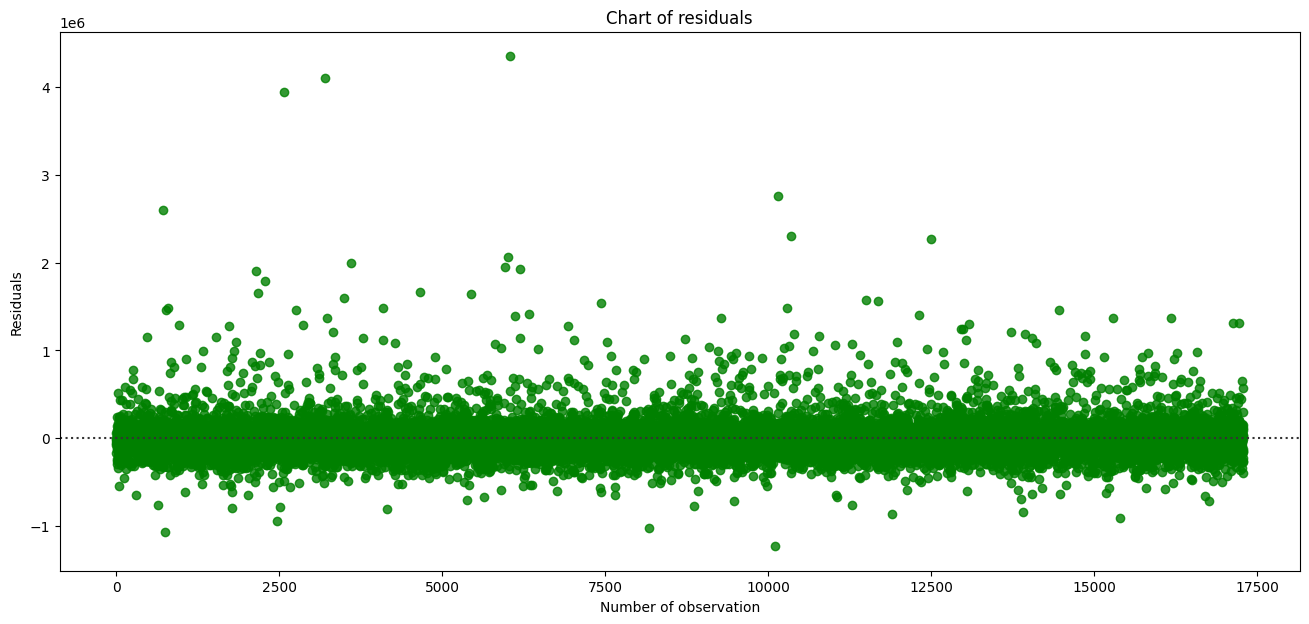

In [108]:
plt.figure(figsize=(16,7))
sns.residplot(x=np.arange(len(model.resid)), y=model.resid, lowess=False, color="g")
plt.title('Chart of residuals')
plt.xlabel('Number of observation')
plt.ylabel('Residuals')
plt.show()

In [109]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(model.resid, X_train)

print("Breusch-Pagan Test:")
print(f"F-statistic: {bp_test[0]}")
print(f"P-value: {bp_test[1]}")

Breusch-Pagan Test:
F-statistic: 2164.435452674111
P-value: 0.0


<br>

### Testing the normality of the error variable

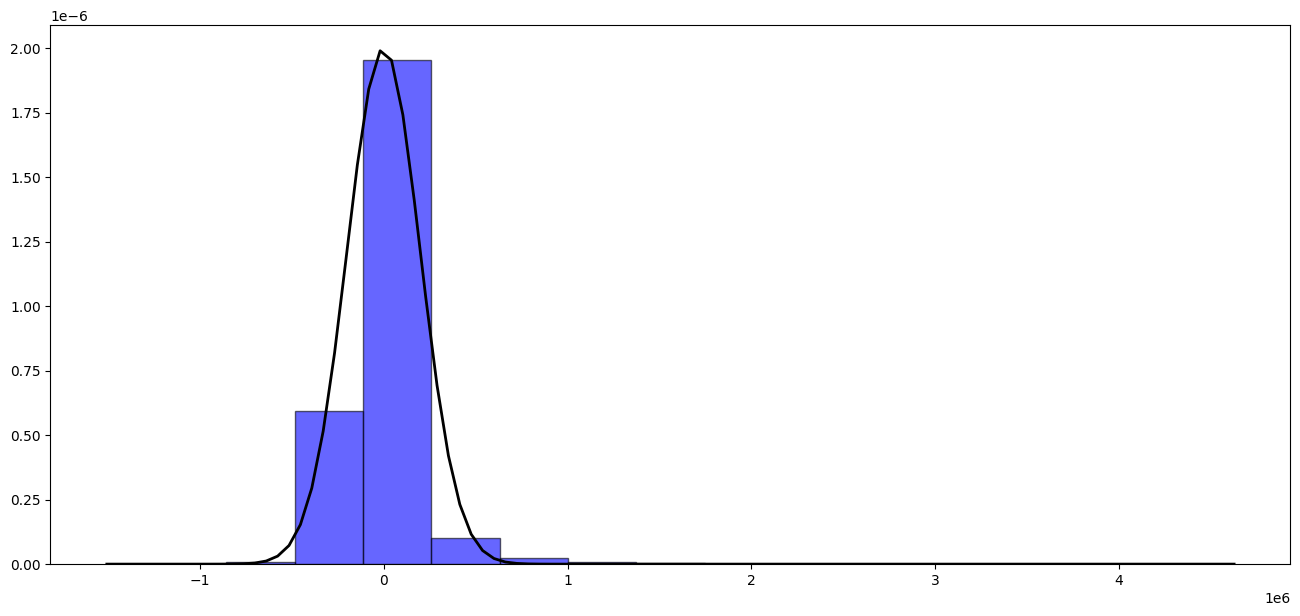

In [110]:
from scipy.stats import norm

plt.figure(figsize=(16,7))
plt.hist(model.resid, bins=15, density=True, alpha=0.6, color='b', edgecolor='black')

mu, std = np.mean(model.resid), np.std(model.resid)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

In [111]:
from scipy.stats import skew, kurtosis

print("Skweness:", skew(model.resid))
print("Kurtosis:", kurtosis(model.resid)+3)

Skweness: 3.6834543049909705
Kurtosis: 51.25148659208921


In [112]:
from scipy.stats import ks_2samp

statistic, p_value = ks_2samp(model.resid, np.random.normal(loc=0, scale=1, size=len(model.resid)))

print(f'Test statistic: {statistic}')
print(f'P-value: {p_value}')

Test statistic: 0.5316367842683632
P-value: 0.0


After conducting tests related to the classical linear regression model, it was found that the assumptions of residual normality and homoscedasticity were not met.

Upon a thorough examination of the residuals, we observed deviations from normality, indicating that the residuals do not follow a normal distribution. Additionally, the tests revealed the presence of heteroscedasticity, suggesting that the variance of the residuals is not constant across all levels of the independent variables. These findings imply that the assumptions underlying the classical linear regression model are violated, which may affect the reliability and validity of the model's estimates and predictions. It is crucial to address these issues to improve the model's robustness and accuracy.

<br>

### Evaluation of the base model

In [113]:
y_pred = model.predict(X_test)

In [114]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 45998562877.06041


In [115]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 128157.3204618632


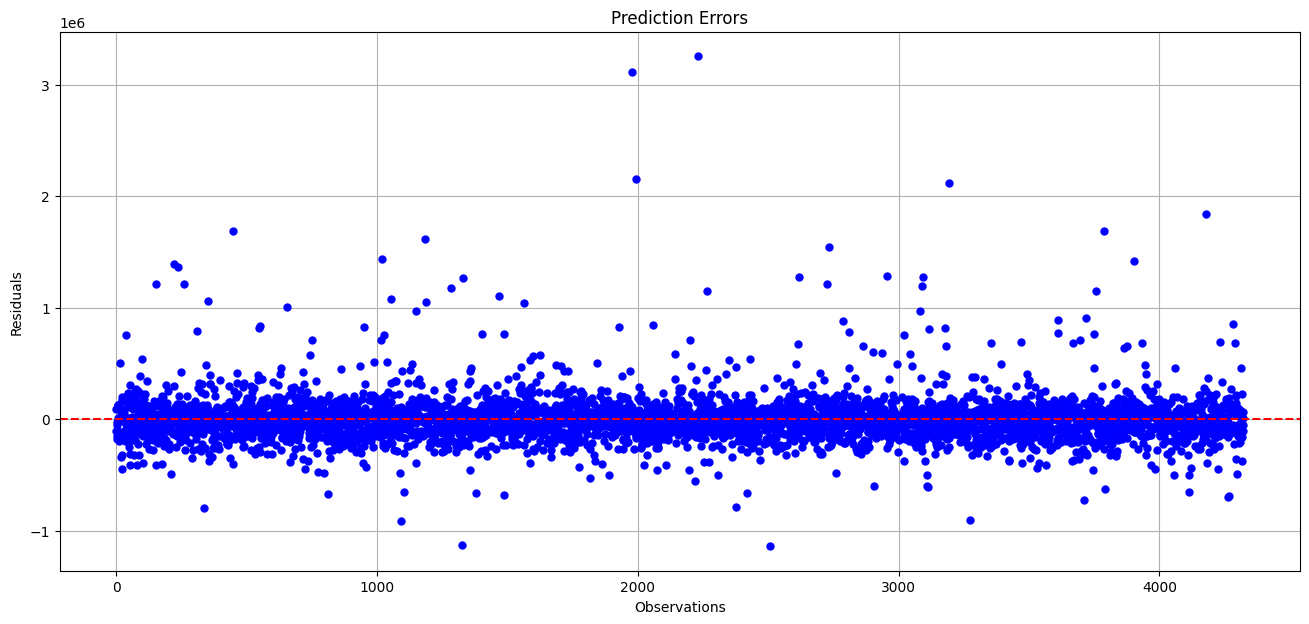

In [116]:
errors = y_test - y_pred

plt.figure(figsize=(16, 7))
plt.plot(np.arange(len(errors)), errors, marker='o', linestyle='', color='blue', markersize=5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Prediction Errors')
plt.xlabel('Observations')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

<br>

### Model reduction

To refine the model, I will focus on the p-values that exceed the significance level of alpha 0.05.

By concentrating on these p-values, we aim to identify and remove variables that do not contribute significantly to the model. Variables with p-values greater than 0.05 indicate that there is insufficient evidence to reject the null hypothesis, meaning these variables do not have a statistically significant impact on the dependent variable. This process of eliminating non-significant predictors helps in simplifying the model, improving its interpretability, and potentially enhancing its predictive accuracy. It ensures that the final model includes only the variables that provide meaningful contributions to explaining the variation in the response variable.

In [117]:
X_train_1 = X_train.drop(['floors', 'sqft_lot'], axis=1)
X_test_1 = X_test.drop(['floors', 'sqft_lot'], axis=1)

In [118]:
model_1 = sm.OLS(y_train, X_train_1).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     2813.
Date:                Sun, 04 Aug 2024   Prob (F-statistic):               0.00
Time:                        15:16:06   Log-Likelihood:            -2.3554e+05
No. Observations:               17290   AIC:                         4.711e+05
Df Residuals:                   17275   BIC:                         4.712e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.449e+07   1.73e+06    -19.892      0.000   -3.79e+07   -3.11e+07
bedrooms      -3.292e+04   2093.020    -15.727      0.000    -3.7e+04   -2.88e+04
bathrooms      4.589e+04   3500.407     13.111      0.000     3.9e+04    5.28e+04
sqft_living     107.6041      2.525     42.617      0.000     102.655     112.553
waterfront      5.68e+05   1.96e+04     28.921      0.000    5.29e+05    6.06e+05
view           5.059e+04   2363.949     21.399      0.000     4.6e+04    5.52e+04
condition      2.865e+04   2584.662     11.085      0.000    2.36e+04    3.37e+04
grade          9.585e+04   2378.170     40.302      0.000    9.12e+04    1.01e+05
sqft_above       70.5582      2.325     30.348      0.000      66.001      75.115
sqft_basement    37.0462      2.698     13.733      0.000      31.759      42.334
yr_built      -2531.6414     78.173    -32.385      0.000   -2684.868   -2378.414
yr_renovated     22.0840      4.081      5.411      0.000      14.084      30.084
lat            5.567e+05   1.16e+04     48.088      0.000    5.34e+05    5.79e+05
long          -1.006e+05   1.31e+04     -7.653      0.000   -1.26e+05   -7.48e+04
sqft_living15    26.1928      3.784      6.921      0.000      18.775      33.611
sqft_lot15       -0.2472      0.058     -4.249      0.000      -0.361      -0.133
==============================================================================
Omnibus:                    15073.396   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1706150.065
Skew:                           3.677   Prob(JB):                         0.00
Kurtosis:                      51.106   Cond. No.                     7.01e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.25e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<br>

In [119]:
y_pred_1 = model_1.predict(X_test_1)

In [120]:
mse = mean_squared_error(y_test, y_pred_1)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 46035506784.45677


In [121]:
mae = mean_absolute_error(y_test, y_pred_1)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 128292.83467276015


The attempt to refine the model by removing non-significant variables did not yield the desired results.

Despite systematically eliminating predictors with p-values greater than the alpha level of 0.05, the model's performance and accuracy did not improve as expected. This indicates that simply removing non-significant variables is insufficient to address the complexities within the data. Therefore, we will now transition to more advanced techniques. These methods, such as regularization (Lasso or Ridge regression), principal component analysis (PCA), or using ensemble methods, will help us to capture the underlying patterns more effectively and enhance the model’s robustness and predictive power. By leveraging these sophisticated approaches, we aim to develop a more reliable and accurate predictive model.

<br>

## Variable selection by means of RFE (Recursive Feature Elimination)

In [141]:
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score

num_features = range(1, X.shape[1] + 1)
scores = []

for n_features in num_features:
    model = LinearRegression()
    rfe = RFE(model, n_features_to_select=n_features)
    rfe.fit(X_train, y_train)
    
    X_train_rfe = rfe.transform(X_train)
    X_test_rfe = rfe.transform(X_test)
    
    model.fit(X_train_rfe, y_train)
    
    y_pred = model.predict(X_test_rfe)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    scores.append((n_features, mse, r2))

In [144]:
scores_df = pd.DataFrame(scores, columns=['Number of Features', 'MSE', 'R^2'])
scores_df

,Number of Features,MSE,R^2
0,1,7.648498e+10,0.494069
1,2,7.649471e+10,0.494005
2,3,7.650435e+10,0.493941
3,4,6.925214e+10,0.541913
4,5,5.878853e+10,0.611127
5,6,5.699370e+10,0.622999
6,7,5.219391e+10,0.654749
7,8,5.062692e+10,0.665114
8,9,4.923337e+10,0.674332
9,10,4.843880e+10,0.679588


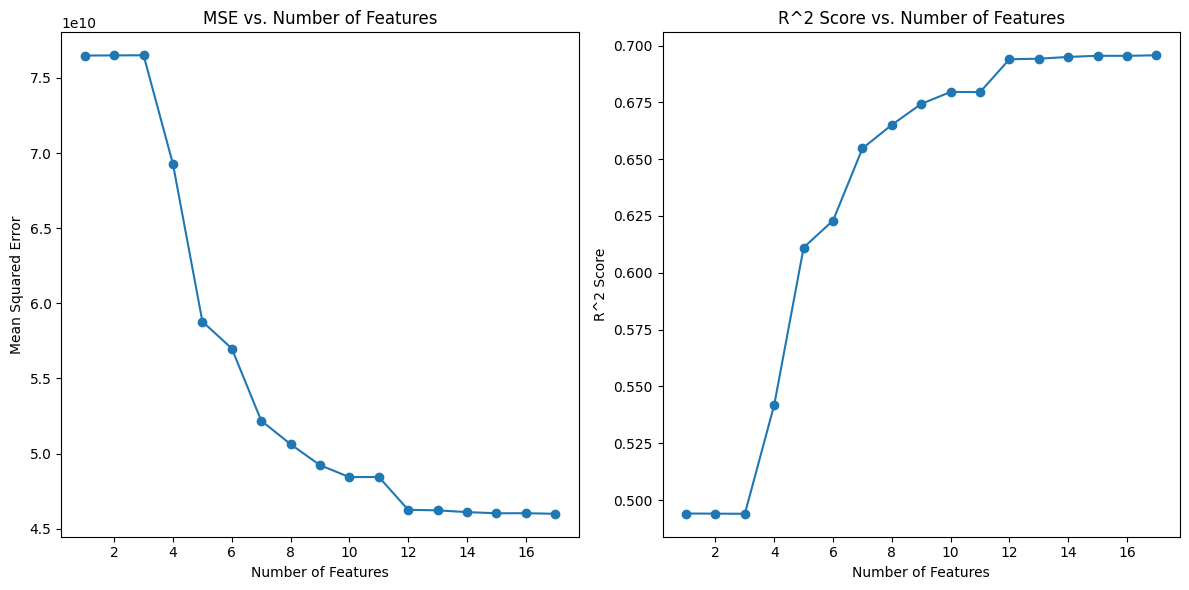

In [143]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(scores_df['Number of Features'], scores_df['MSE'], marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs. Number of Features')

plt.subplot(1, 2, 2)
plt.plot(scores_df['Number of Features'], scores_df['R^2'], marker='o')
plt.xlabel('Number of Features')
plt.ylabel('R^2 Score')
plt.title('R^2 Score vs. Number of Features')

plt.tight_layout()
plt.show()

As indicated by the plots, the linear model's performance improves with the inclusion of more variables. Specifically, models incorporating the 12 most significant variables demonstrate the best fit and predictive accuracy.

The analysis shows a clear trend: as additional relevant predictors are included, the model's ability to explain the variability in the dependent variable increases. This is evidenced by higher coefficients of determination (R²) and lower information criteria values. In particular, models that leverage the top 12 most significant variables achieve a robust balance between complexity and explanatory power. These models capture essential relationships within the data, leading to more reliable predictions and a deeper understanding of the underlying dynamics. The comprehensive inclusion of these key variables ensures that the model is both thorough and precise, making it a valuable tool for analytical and forecasting purposes.

<br>

## Conclusion

The conclusion drawn from this analysis is that the variables are collectively statistically significant, as well as individually, with the exception of the variables "floors" and "sqft_lot". This indicates that these two variables do not contribute meaningfully to the model and do not have a significant impact on the dependent variable.

However, it is also important to note that while the linear regression model has provided some insights, it is not the optimal solution for this analysis. The linear model's assumptions, such as linearity, normality of residuals, and homoscedasticity, may not hold true in this context. This can lead to biased estimates and unreliable predictions. Moreover, the linear model may fail to capture complex, non-linear relationships within the data.

Considering these limitations, it is advisable to explore more advanced modeling techniques that can handle non-linearity and interactions between variables more effectively. Methods such as decision trees, random forests, gradient boosting machines, or neural networks could offer better performance and provide a deeper understanding of the data. These approaches can model complex patterns and improve the accuracy and robustness of the predictions, making them more suitable for sophisticated data analysis.